Playground to play with CTC loss function and explore a proxy signal (saw) to be used alternatively to CTC loss (w/ MSE)

In [43]:
import torch
from torch.autograd import Variable
from warpctc_pytorch import CTCLoss

import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
ctc_loss = CTCLoss()
# expected shape of seqLength x batchSize x alphabet_size
_0 = [1., 0, 0]
_1 = [0, 1., 0]
_2 = [0, 0, 1.]

probs = torch.FloatTensor([[ _1, _1, _0, _1, _1,]]).transpose(0, 1).contiguous()
labels = Variable(torch.IntTensor([2, 1, 2, 1import torch as th
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import torch.optim as optim
from collections import OrderedDict
import itertools

import os
from torchvision import datasets, transforms, models

from fishdataset import SeqDataset, SubsetSampler,collate_seqs
from sklearn.model_selection import train_test_split
import argparse
import pandas as pd
import numpy as np
from masked_cross_entropy import compute_loss
, 2]))
# 1 2 -> 11 22, 1112,2221,1_

#probs = torch.FloatTensor([[[1,2,3,4,5], [6,7,8,9,10], [11,12,13,14,15]]]).transpose(0, 1).contiguous()
#labels = Variable(torch.IntTensor([0,3]))
label_sizes = Variable(torch.IntTensor([5]))
probs_sizes = Variable(torch.IntTensor([5]))
probs = Variable(probs, requires_grad=True) # tells autograd to compute gradients for probs
cost = ctc_loss(probs, labels, probs_sizes, label_sizes)
cost.backward()
print(cost)
print(probs)
print(labels)

Variable containing:
 5.7572
[torch.FloatTensor of size 1]

Variable containing:
(0 ,.,.) = 
  0  1  0

(1 ,.,.) = 
  0  1  0

(2 ,.,.) = 
  1  0  0

(3 ,.,.) = 
  0  1  0

(4 ,.,.) = 
  0  1  0
[torch.FloatTensor of size 5x1x3]

Variable containing:
 2
 1
 2
 1
 2
[torch.IntTensor of size 5]



In [18]:
cost

Variable containing:
 0
[torch.FloatTensor of size 1]

In [37]:
a = torch.FloatTensor([1,2,3,4,5]).unsqueeze(dim=0)
b = torch.FloatTensor([6,7,8,9,10]).unsqueeze(dim=0)
c = torch.FloatTensor([11,12,13,14,15]).unsqueeze(dim=0)
t = (a+b+c)
print(t)
print(torch.nn.Softmax()(a), torch.nn.Softmax()(b), torch.nn.Softmax()(c))


 18  21  24  27  30
[torch.FloatTensor of size 1x5]

(Variable containing:
 0.0117  0.0317  0.0861  0.2341  0.6364
[torch.FloatTensor of size 1x5]
, Variable containing:
 0.0117  0.0317  0.0861  0.2341  0.6364
[torch.FloatTensor of size 1x5]
, Variable containing:
 0.0117  0.0317  0.0861  0.2341  0.6364
[torch.FloatTensor of size 1x5]
)


In [13]:
import torch as th
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import torch.optim as optim
from collections import OrderedDict
import itertools

import os
from torchvision import datasets, transforms, models

from fishdataset import SeqDataset, SubsetSampler,collate_seqs
from sklearn.model_selection import train_test_split
import argparse
import pandas as pd
import numpy as np
from masked_cross_entropy import compute_loss


In [14]:

TRAIN_X_CSV = 'train_crops_X.csv'
TRAIN_Y_CSV = 'train_crops_Y.csv'

dataset = SeqDataset(
        X_csv_file=TRAIN_X_CSV,
        Y_csv_file=TRAIN_Y_CSV,
        return_numpy=False
        )

Index([u'00WK7DR6FyPZ5u3A', u'01wO3HNwawJYADQw', u'02p3Yn87z0b5grhL',
       u'05RagNzyjVdXeUFR', u'06aFbpjpYHVBLJZa', u'09GA0YdSz0NvJUJx',
       u'0D5zA3WRD5pXjr8j', u'0EmM5wsVVNqaKNaM', u'0L5wBDT4CEazgAw6',
       u'0QAlqRiUad7xcB9k',
       ...
       u'zXZSvmqfqvnwJgn1', u'zZCiaXh6FllAYILs', u'zdwVt8U2VF8pzpsy',
       u'zgjGuS2fRDKbmb5x', u'ziSjGcGfbowUyuBO', u'zmYfc0lC2MQ3gfrW',
       u'zmYmO0WstvQIl19P', u'zqWCbHoUPI9lMVBK', u'zrqy3XarL6jSoraK',
       u'zxjr6V8bFiFHxpNU'],
      dtype='object', name=u'video_id', length=1332)
Index([u'00WK7DR6FyPZ5u3A', u'01wO3HNwawJYADQw', u'02p3Yn87z0b5grhL',
       u'05RagNzyjVdXeUFR', u'06aFbpjpYHVBLJZa', u'09GA0YdSz0NvJUJx',
       u'0D5zA3WRD5pXjr8j', u'0EmM5wsVVNqaKNaM', u'0L5wBDT4CEazgAw6',
       u'0QAlqRiUad7xcB9k',
       ...
       u'zXZSvmqfqvnwJgn1', u'zZCiaXh6FllAYILs', u'zdwVt8U2VF8pzpsy',
       u'zgjGuS2fRDKbmb5x', u'ziSjGcGfbowUyuBO', u'zmYfc0lC2MQ3gfrW',
       u'zmYmO0WstvQIl19P', u'zqWCbHoUPI9lMVBK', u'zrqy3XarL6jSoraK',


In [15]:
idx_train, idx_valid = train_test_split(range(len(dataset)), test_size=0.1, random_state=42)
train_sampler = SubsetRandomSampler(idx_train[:])
valid_sampler = SubsetRandomSampler(idx_valid[:])

In [18]:
train_loader = DataLoader(dataset,
                      batch_size=1,
                      sampler=train_sampler,
                      num_workers=4,
                      collate_fn= collate_seqs,
                      pin_memory=True if th.cuda.is_available() else False)

valid_loader = DataLoader(dataset,
                      batch_size=1,
                      sampler=valid_sampler,
                      num_workers=4,
                      collate_fn= collate_seqs,
                      pin_memory=True if th.cuda.is_available() else False)

In [24]:
x,y=next(iter(train_loader))

In [25]:
x

[
  8.2564e-16  1.6611e-16  2.0235e-15  ...   1.0000e+00  1.2930e-14  4.4377e-12
  8.3563e-17  4.0882e-17  6.2200e-16  ...   1.0000e+00  5.5719e-15  5.2037e-14
  4.5200e-18  6.2748e-16  4.8571e-17  ...   1.0000e+00  2.8652e-14  7.4439e-14
                 ...                   ⋱                   ...                
  5.5803e-12  3.4328e-13  9.4222e-14  ...   1.0000e+00  5.3096e-12  1.4740e-11
  1.2803e-09  4.4093e-12  4.4455e-13  ...   1.0000e+00  5.3439e-12  2.9853e-10
  5.5100e-12  4.9906e-14  4.2687e-14  ...   1.0000e+00  1.4950e-12  6.7717e-12
 [torch.FloatTensor of size 2913x8]]

In [29]:
y=y[0][:,8]

In [30]:
y


   1
   1
   1
 ⋮  
 110
 110
 110
[torch.FloatTensor of size 2913]

In [33]:
y.numpy()

array([   1.,    1.,    1., ...,  110.,  110.,  110.], dtype=float32)

In [35]:
_, u = np.unique(y.numpy(), return_counts=True)

In [36]:
u

array([ 21,  23,  22,  25,  20, 165,  18,  17,  31,  19,  21,  23,  18,
        19,  25,  26,  23,  26, 143,  26,  21,  22,  21,  19,  19,  24,
        22,  26,  23,  23,  24,  32,  22,  20,  26,  26,  55,  19,  20,
        19,  21,  21,  23,  18,  20,  23,  24,  20,  26,  22,  20,  22,
        20,  20,  19,  22,  21,  24,  26,  18,  20,  21,  25,  39,  20,
        21,  24,  34, 129,  19,  20,  25,  20,  24,  22,  19,  19,  20,
        18,  23,  24,  26,  41,  27,  17,  19,  25,  23,  27,  19,  22,
        21,  18,  23,  18,  22,  20,  22,  24,  16,  24,  25,  21,  35,
        28,  68,  23,  25,  20,   4])

In [37]:
u.sum()

2913

In [45]:
i = 0
saw = np.empty([u.sum()], dtype=np.float32)
for r in u:
    saw[i:i+r] = np.linspace(1,0,r)
    i += r

In [46]:
saw

array([ 1.        ,  0.94999999,  0.89999998, ...,  0.66666669,
        0.33333334,  0.        ], dtype=float32)

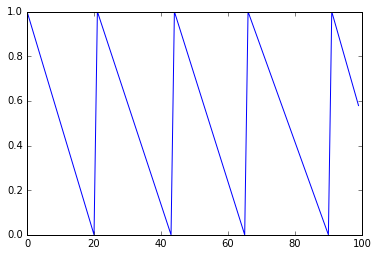

In [48]:
plt.plot(saw[:100])

In [52]:
a = th.randn(10,2)
b = th.randn(10,2)
a+b


-1.0041  0.0625
-1.2722 -2.6096
 0.3727 -2.4727
-4.2572  0.6895
 0.3473 -1.9943
-3.4614  2.2615
-0.9871  0.1445
-0.2238 -0.7499
 0.1066  1.2482
 2.5104  2.7552
[torch.FloatTensor of size 10x2]

In [56]:
th.norm(a-b,2, dim=1)


 1.1524
 2.6862
 1.0201
 2.4475
 2.1181
 1.0403
 0.5737
 1.5965
 1.7965
 0.3405
[torch.FloatTensor of size 10]